In [141]:
import matplotlib
matplotlib.rc("xtick", labelsize=15) 
matplotlib.rc("ytick", labelsize=15) 
matplotlib.rcParams["font.size"] = 20
from matplotlib import pyplot as plt
import numpy as np
import scipy
import scipy.interpolate as interpolate
import scipy.linalg
import scipy.sparse as sparse
import scipy.signal as signal
import scipy.special
from typing import List

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [142]:
import two_photon_multi_emitter_fdtd as fdtd
import two_photon_fdtd as fdtd_old
import bic_system
import multi_bound_state_trapping as mbs_trapping

## For single qubit

In [305]:
taus = [0.5]
gammas = [1]
sys = bic_system.TimeDelayedFeedbackSystem(taus, gammas)
eps = sys.compute_bound_state_olap()

In [312]:
freqs = np.linspace(-700, 700, 200001) / tau
xis = sys.compute_scattering_state_olap(freqs)

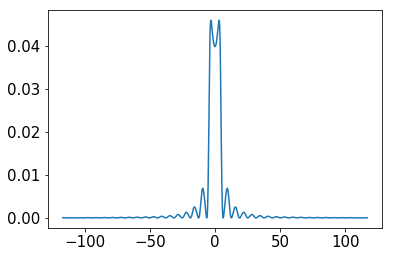

In [314]:
plt.plot(freqs, np.abs(xis)**2)

In [315]:
prob_mat, xi_conv, gamma_decay = mbs_trapping.compute_cw_prob_matrix(freqs, sys, rep=0.5)

(200001, 1)


(-40, 40)

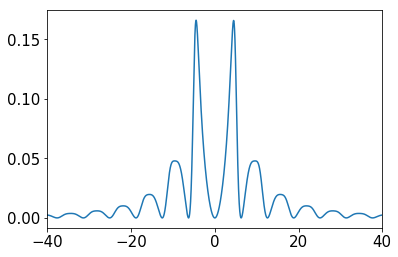

In [316]:
p1 = np.abs(prob_mat[:, 0, 0])**2 / np.real(xi_conv[:, 0, 0])
plt.plot(freqs, p1)
plt.xlim([-40, 40])

In [414]:
# Study probability as a function of delay.
tau_vals = np.linspace(0.05, 3.0, 100)
xi_vals = []
eps_vals = []
probs = []
for tau in tau_vals:
    freqs = np.linspace(-2500, 2500, 200001) / tau
    sys = bic_system.TimeDelayedFeedbackSystem([tau], [1])
    xis = sys.compute_scattering_state_olap(freqs)
    eps = sys.compute_bound_state_olap()
    prob_mat, xi_conv = mbs_trapping.compute_cw_prob_matrix(freqs, sys)
    xi_vals.append(xis[:, 0])
    eps_vals.append(eps[0, 0])
    probs.append(np.max(np.abs(prob_mat[:, 0, 0]**2) / np.real(xi_conv[:, 0, 0])))

(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200001, 1)
(200

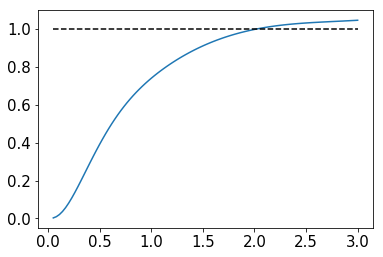

In [417]:
plt.plot(tau_vals, probs)
plt.plot(tau_vals, np.ones_like(tau_vals), '--k')

(200101, 1)
0.8495586963686288


(-10, 10)

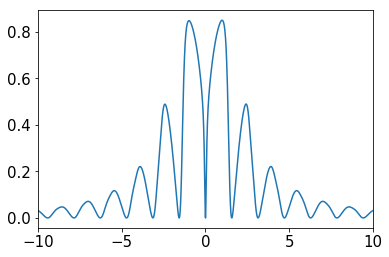

In [466]:
# Long delay value.
delay = 2.0
sys = bic_system.TimeDelayedFeedbackSystem([delay], [1.0])
freqs = np.linspace(-1000, 1000, 200101) / tau
prob_mat, xi_conv = mbs_trapping.compute_cw_prob_matrix(freqs, sys)
prob_fun = np.abs(prob_mat[:, 0, 0])**2 / np.real(xi_conv[:, 0, 0])
print(np.max(prob_fun))

plt.plot(freqs, prob_fun)
plt.xlim([-10, 10])

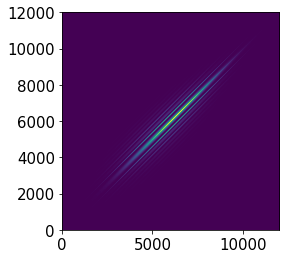

In [467]:
# FDTD simulations.
cen_freq_ind = np.argmax(prob_fun)
cen_freq = freqs[cen_freq_ind]
tau = 20.0
dt = 0.01
num_init_bins = 12000

init_state = mbs_trapping.compute_two_photon_state(
    sys, [1], cen_freq, tau, num_init_bins, dt)
plt.imshow(np.abs(init_state)**2, origin="lower")

In [468]:
sim_time = 200
state, ex_state = fdtd.simulate([delay], [1], [np.pi],
                                sim_time, dt, init_state)

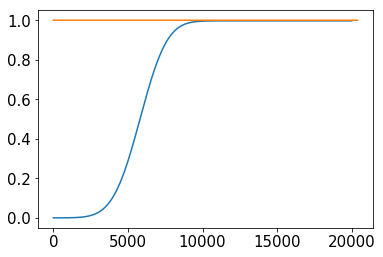

In [470]:
plt.plot(np.sum(np.abs(state[0])**2, axis=0) * dt * (1 + 2 * delay))
plt.plot(np.ones(state[0].shape[0]))

In [438]:
len(state)

1

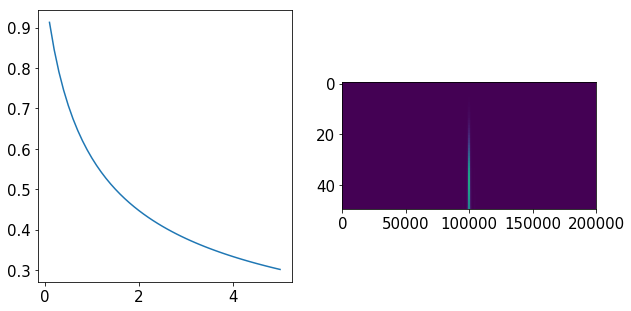

In [332]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(tau_vals, eps_vals)
plt.subplot(1, 2, 2)
plt.imshow(np.abs(xi_vals)**2, aspect=2000)

In [224]:
cen_freq_ind = np.argmax(p1)
cen_freq = freqs[cen_freq_ind]
print("Central wavepacket frequency = ", cen_freq)
print("Prob at wavepacket frequency = ", p1[cen_freq_ind])
print("Prob at wavepacket frequency = ", p2[cen_freq_ind])

tau = 6.0
sim_time = 40
dt = 0.01
num_init_bins = 4000

init_state = mbs_trapping.compute_two_photon_state(
    sys, [1, 0], cen_freq, tau, num_init_bins, dt)

state, ex_state = fdtd.simulate(taus, gammas, [np.pi],
                                sim_time, dt, init_state)

Central wavepacket frequency =  2.2749999999999773
Prob at wavepacket frequency =  0.3852139220331726
Prob at wavepacket frequency =  0.047925480811216475


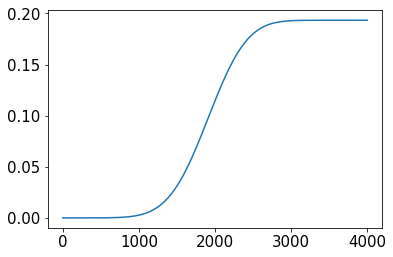

In [225]:
plt.plot(np.sum(np.abs(state[0])**2, axis=0) * dt)

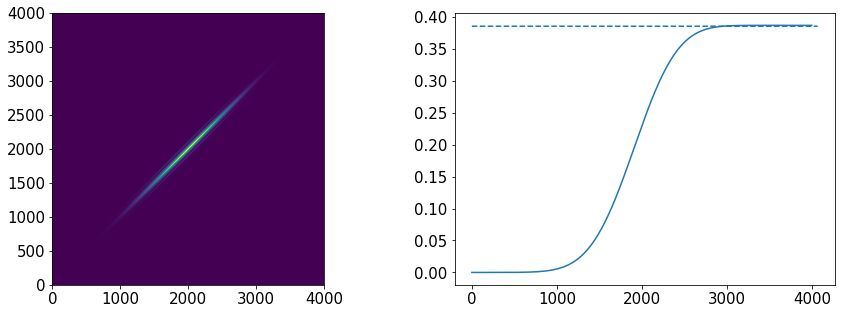

In [226]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.abs(init_state)**2, origin="lower")
plt.subplot(1, 2, 2)
plt.plot(np.sum(np.abs(state[0])**2, axis=0) * dt * (1 + 2 * taus[0]))
plt.plot(np.ones(bs_1.shape[0]) * p1[cen_freq_ind], linestyle="--", color="C0")

## For two qubits

In [266]:
taus = [0.25, 0.35]
gammas = [1, 1]
sys = bic_system.TimeDelayedFeedbackSystem(taus, gammas)
eps = sys.compute_bound_state_olap()

In [267]:
freqs = np.linspace(-700, 700, 200001)
xis = sys.compute_scattering_state_olap(freqs)

(-40, 40)

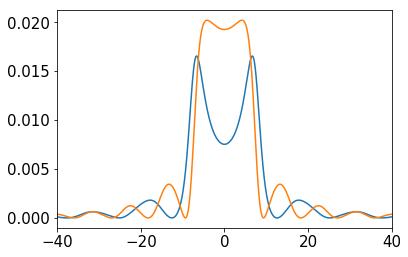

In [268]:
plt.plot(freqs, np.abs(xis[:, 0])**2)
plt.plot(freqs, np.abs(xis[:, 1])**2)
plt.xlim([-40, 40])

In [276]:
prob_mat, xi_conv, gamma_decay = mbs_trapping.compute_cw_prob_matrix(freqs, sys)
prob_mat.shape

(200001, 2)


(200001, 2, 2)

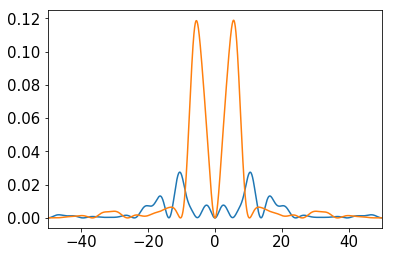

In [280]:
probs_an = [np.abs(prob_mat[:, k, 0])**2 / np.real(xi_conv[:, 0, 0]) for k in range(prob_mat.shape[1])]
for p in probs_an:
    plt.plot(freqs, p)
    plt.xlim([-50, 50])

In [301]:
cen_freq_ind = np.argmax(p2) + 6000
cen_freq = freqs[cen_freq_ind]
print("Central wavepacket frequency = ", cen_freq)
print("Prob at wavepacket frequency = ", p1[cen_freq_ind])
print("Prob at wavepacket frequency = ", p2[cen_freq_ind])

tau = 6.0
sim_time = 40
dt = 0.01
num_init_bins = 4000

init_state = mbs_trapping.compute_two_photon_state(
    sys, [1, 0], cen_freq, tau, num_init_bins, dt)

state, ex_state = fdtd.simulate(taus, gammas, [np.pi, np.pi],
                                sim_time, dt, init_state)

Central wavepacket frequency =  47.55799999999999
Prob at wavepacket frequency =  0.0015880497609001673
Prob at wavepacket frequency =  3.953024365443075e-05


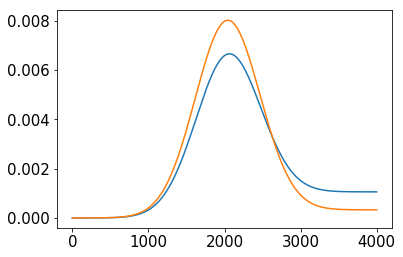

In [302]:
for s in state:
    plt.plot(np.sum(np.abs(s)**2, axis=0) * dt)

In [303]:
eps_inv = np.linalg.inv(eps)
state_bs = []
for n in range(eps_inv.shape[0]):
    bs = 0
    for m in range(eps_inv.shape[1]):
        bs += (eps_inv[n, m] * state[m])
    state_bs.append(bs)
    
prob_bs = [np.sum(np.abs(bs)**2, axis=0) * dt for bs in state_bs]


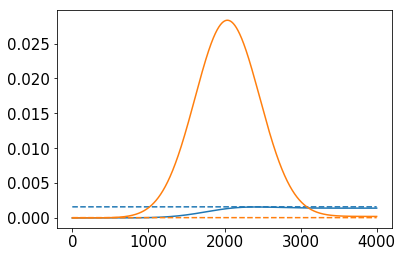

In [304]:
for k, p in enumerate(prob_bs):
    plt.plot(p, color="C{}".format(k))
    plt.plot(np.ones_like(p) * probs_an[k][cen_freq_ind], linestyle="--", color="C{}".format(k))